In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2020.csv")
df_2020 = pd.read_csv(csv_path)

df_2020

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2020,6/30/2020,6/30/2020,14,59.731520,Unknown / Unidentified
1,2020,11/6/2020,11/6/2020,7,128.170800,Arson
2,2020,6/18/2020,6/23/2020,11,109.602300,Powerline
3,2020,6/1/2020,6/4/2020,2,685.585000,Equipment Use
4,2020,8/10/2020,8/11/2020,14,27.300480,Unknown / Unidentified
...,...,...,...,...,...,...
489,2020,6/26/2020,6/28/2020,9,29.491930,Miscellaneous
490,2020,6/7/2020,6/20/2020,9,10.510640,Miscellaneous
491,2020,11/1/2020,11/1/2020,10,1.392398,Vehicle
492,2020,10/2/2020,10/2/2020,2,43.198230,Equipment Use


In [3]:
# Convert 'Alarm Date' to datetime
df_2020['Alarm Date'] = pd.to_datetime(df_2020['Alarm Date'])

# Extract month name
df_2020['Month'] = df_2020['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2020 = df_2020.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2020['Month'] = pd.Categorical(monthly_summary_2020['Month'], categories=months_order, ordered=True)
monthly_summary_2020 = monthly_summary_2020.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2020['Total Acres Burned'] = monthly_summary_2020['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2020)

        Month  Number of Incidents  Total Acres Burned
3    February                   11              606.95
6       March                    5              271.71
0       April                    5              128.22
7         May                   30             1948.45
5        June                  107            25710.49
4        July                  111           361927.76
1      August                  123          2877189.95
10  September                   44           830200.63
9     October                   32            38564.83
8    November                   11            23277.98
2    December                   15            13073.22


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


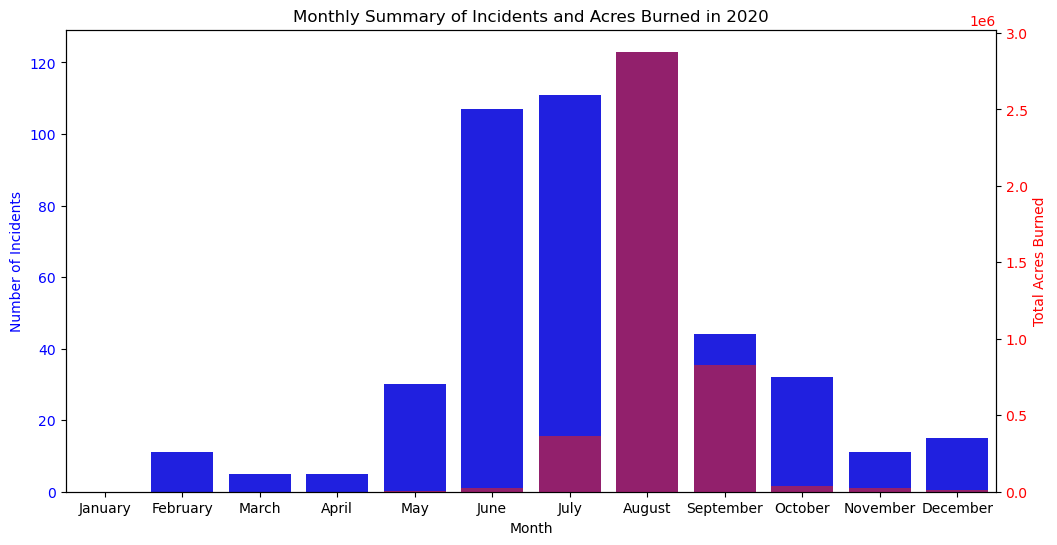

In [4]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2020, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2020, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2020')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2020.png")
plt.savefig(output_file)

plt.show()